In [1]:
import pandas as pd

summary_df = pd.read_excel("data/PXD034772/DIA/dia_result_compare.xlsx")

In [2]:
for i in range(summary_df.shape[0]):
    tmp_id = summary_df.loc[i, "sample_id"]
    tmp_id = tmp_id.replace("_", "-")
    tmp_id = "0" + tmp_id
    summary_df.loc[i, "sample_id"] = tmp_id

summary_df.columns = ["sample_id", "original"]
summary_df

,sample_id,original
0,02287-01,27137
1,02287-02,29262
2,02287-04,26322
3,02287-05,20371
4,02287-06,17277
5,02287-10,27406
6,02288-08,15630
7,02288-10,17972
8,02289-01,20978
9,02289-02,20265


In [3]:
files = []
base_path = "data/PXD034772/DIA"
for i in range(summary_df.shape[0]):
    tmp_id = summary_df.loc[i, "sample_id"]
    tmp_file = f"{base_path}/{tmp_id}/report.tsv"
    files.append(tmp_file)

In [4]:
import numpy as np

summary_df["new"] = [0] * summary_df.shape[0]

for i in range(len(files)):
    file = files[i]
    df = pd.read_table(file, sep="\t")
    peptide_array = np.unique(df["Stripped.Sequence"])
    summary_df.loc[i, "new"] = len(peptide_array)

summary_df

,sample_id,original,new
0,02287-01,27137,26369
1,02287-02,29262,31507
2,02287-04,26322,27791
3,02287-05,20371,19889
4,02287-06,17277,17144
5,02287-10,27406,29622
6,02288-08,15630,18306
7,02288-10,17972,24285
8,02289-01,20978,20601
9,02289-02,20265,19276


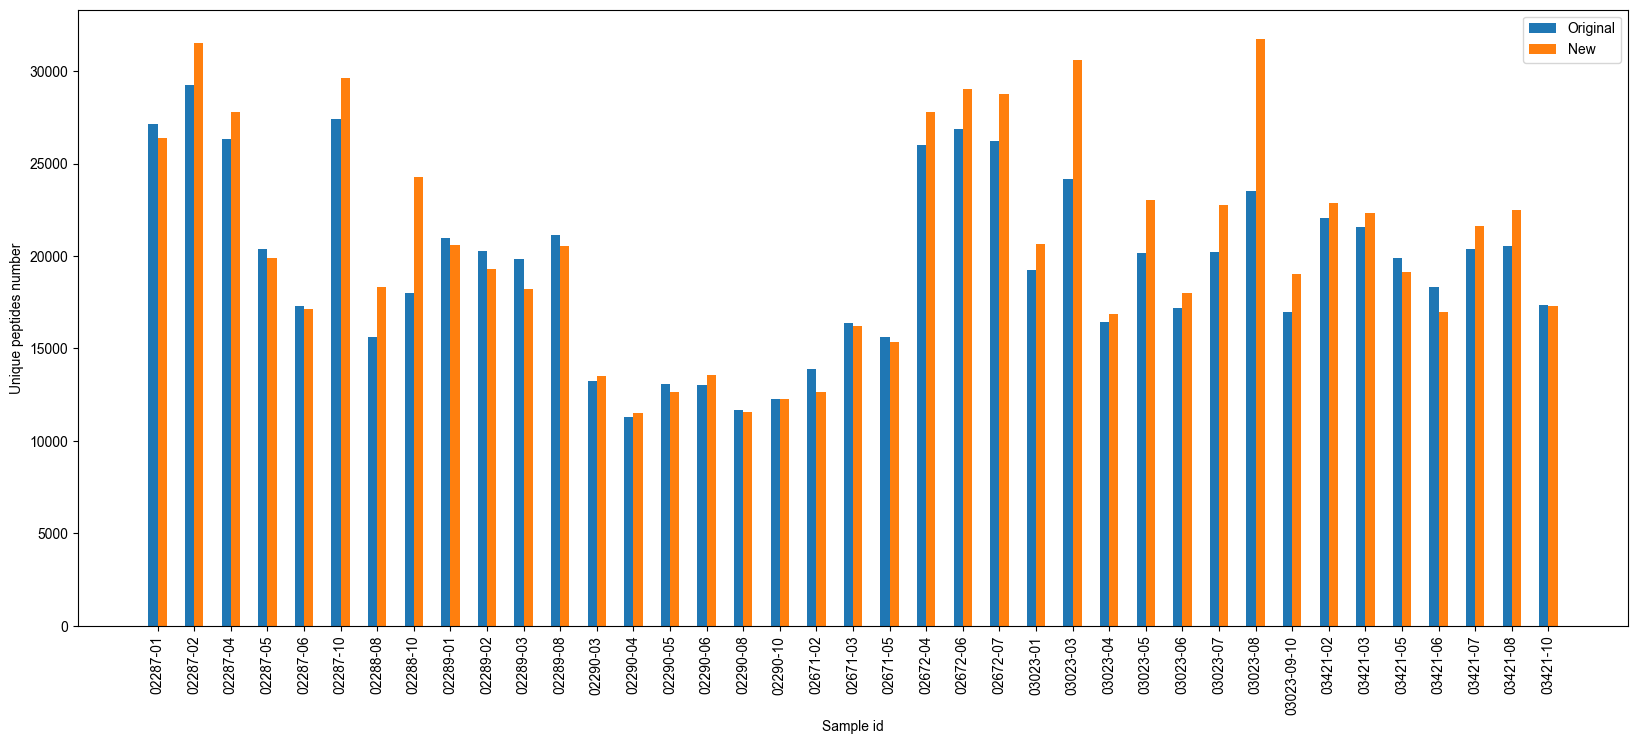

In [5]:
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Arial"
plt.figure(figsize=(20, 8))
# 设置柱状图的位置和宽度
bar_width = 1
index = 4 * np.arange(summary_df.shape[0])

# 绘制柱状图
plt.bar(index, summary_df["original"], bar_width, label="Original")
plt.bar(index + bar_width, summary_df["new"], bar_width, label="New")

# 添加标题和轴标签
plt.xlabel("Sample id")
plt.ylabel("Unique peptides number")

# 显示图例
plt.legend()

# 在X轴上设置类别标签
plt.xticks(index + bar_width / 2, summary_df["sample_id"], rotation=90)

# 显示图表
# plt.tight_layout()
plt.savefig("figures/fig2_dia.svg", format="svg", dpi=300, bbox_inches="tight")